# LINEAR REGRESSION - BOSTON HOUSING DATASET

Importing the required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Loading the dataset now

In [21]:
df = pd.read_csv('HousingData.csv')

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full value property tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
LSTAT - lower status of the population  
MEDV - Median value of owner-occupied homes in 1000's

A summary of the DataFrame, including data types and non-null counts

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Displaying all columns with first few rows

In [23]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


A summary of the DataFrame, including data types and non-null counts

In [24]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

The dataset contains missing value's, so cleaning the data before proceeding.

We will count the number of null entries in each column first

In [25]:
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Total number of null entries

In [26]:
total_null_count = df.isnull().sum().sum()
print(total_null_count)

120


In [27]:
df.duplicated().sum()

np.int64(0)

Hence, dataset does not contain any duplicate rows

Now, with the empty values, we have an option to drop them but since this is house pricing we will instead fill those values with Mean/Median/Mode of the values of that column. These 3 are available in the pandas library, out of them, here, we would be using mean since it is the most logical approach considering the type of data.

In [28]:
df.fillna({
    'CRIM': df['CRIM'].mean(),
    'ZN': df['ZN'].mean(),
    'INDUS': df['INDUS'].mean(),
    'CHAS': df['CHAS'].mean(),
    'AGE': df['AGE'].mean(),
    'LSTAT': df['LSTAT'].mean()
}, inplace=True)

In [29]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
df_cleaned = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.069959,0.250233,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.518519,27.439466,2.90000,45.925000,74.45000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<function matplotlib.pyplot.show(close=None, block=None)>

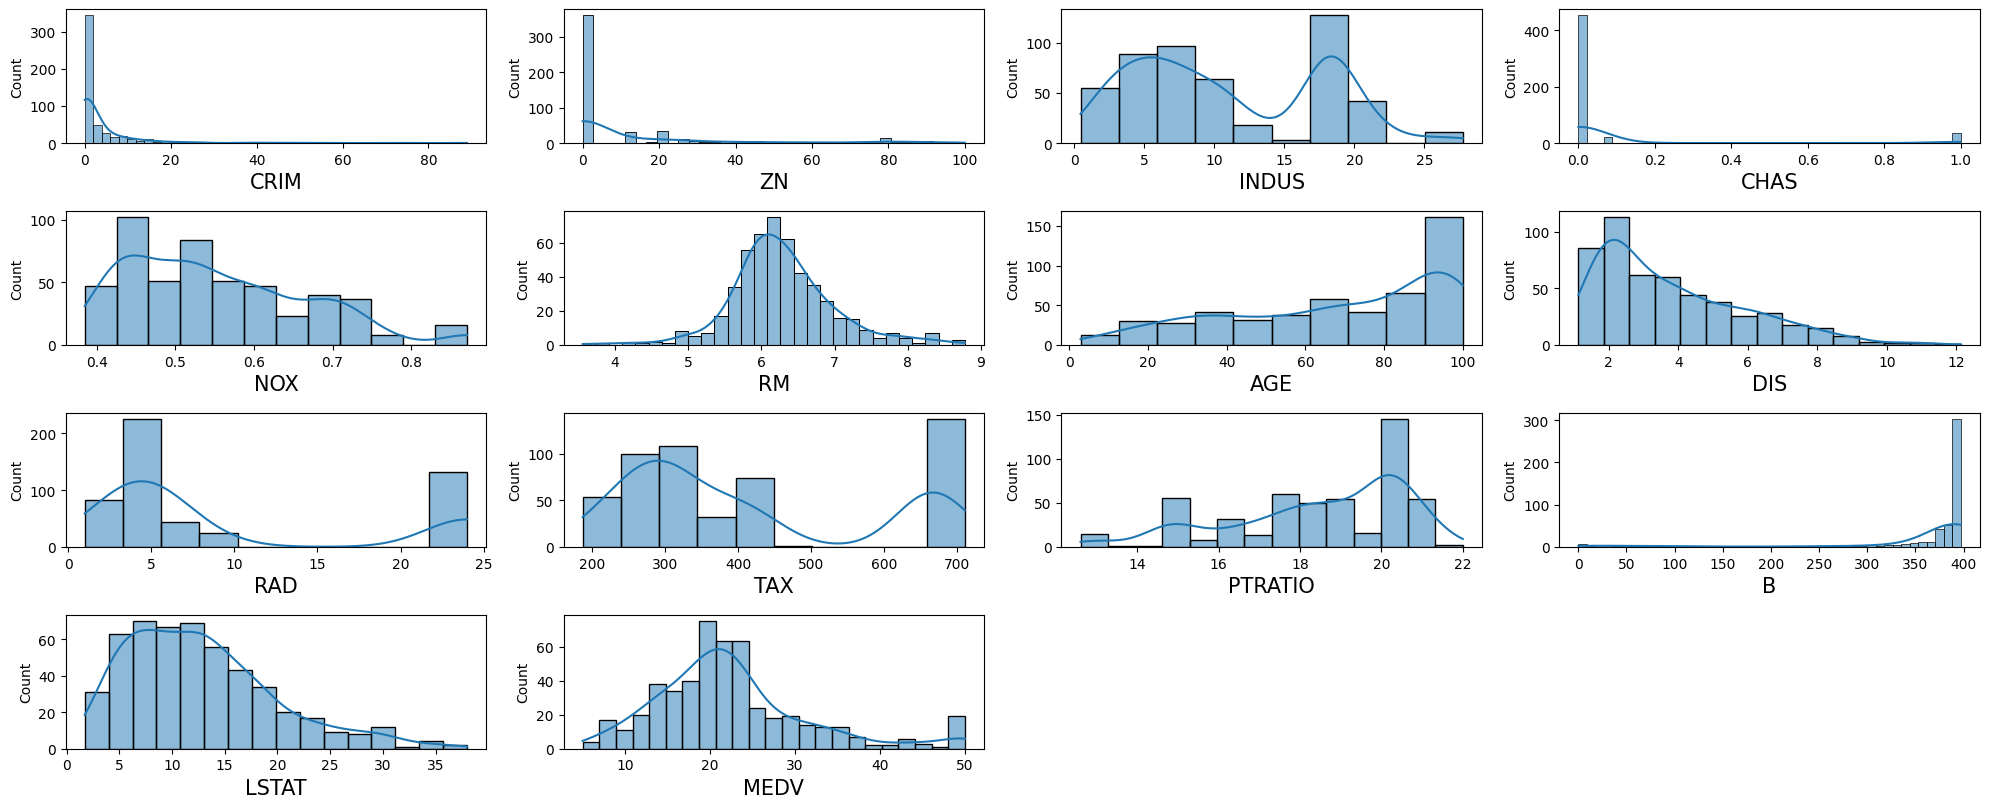

In [32]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_cleaned.columns):
        plt.subplot(20, 4, plotnum)
        sns.histplot(df_cleaned[columns],kde = True)
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

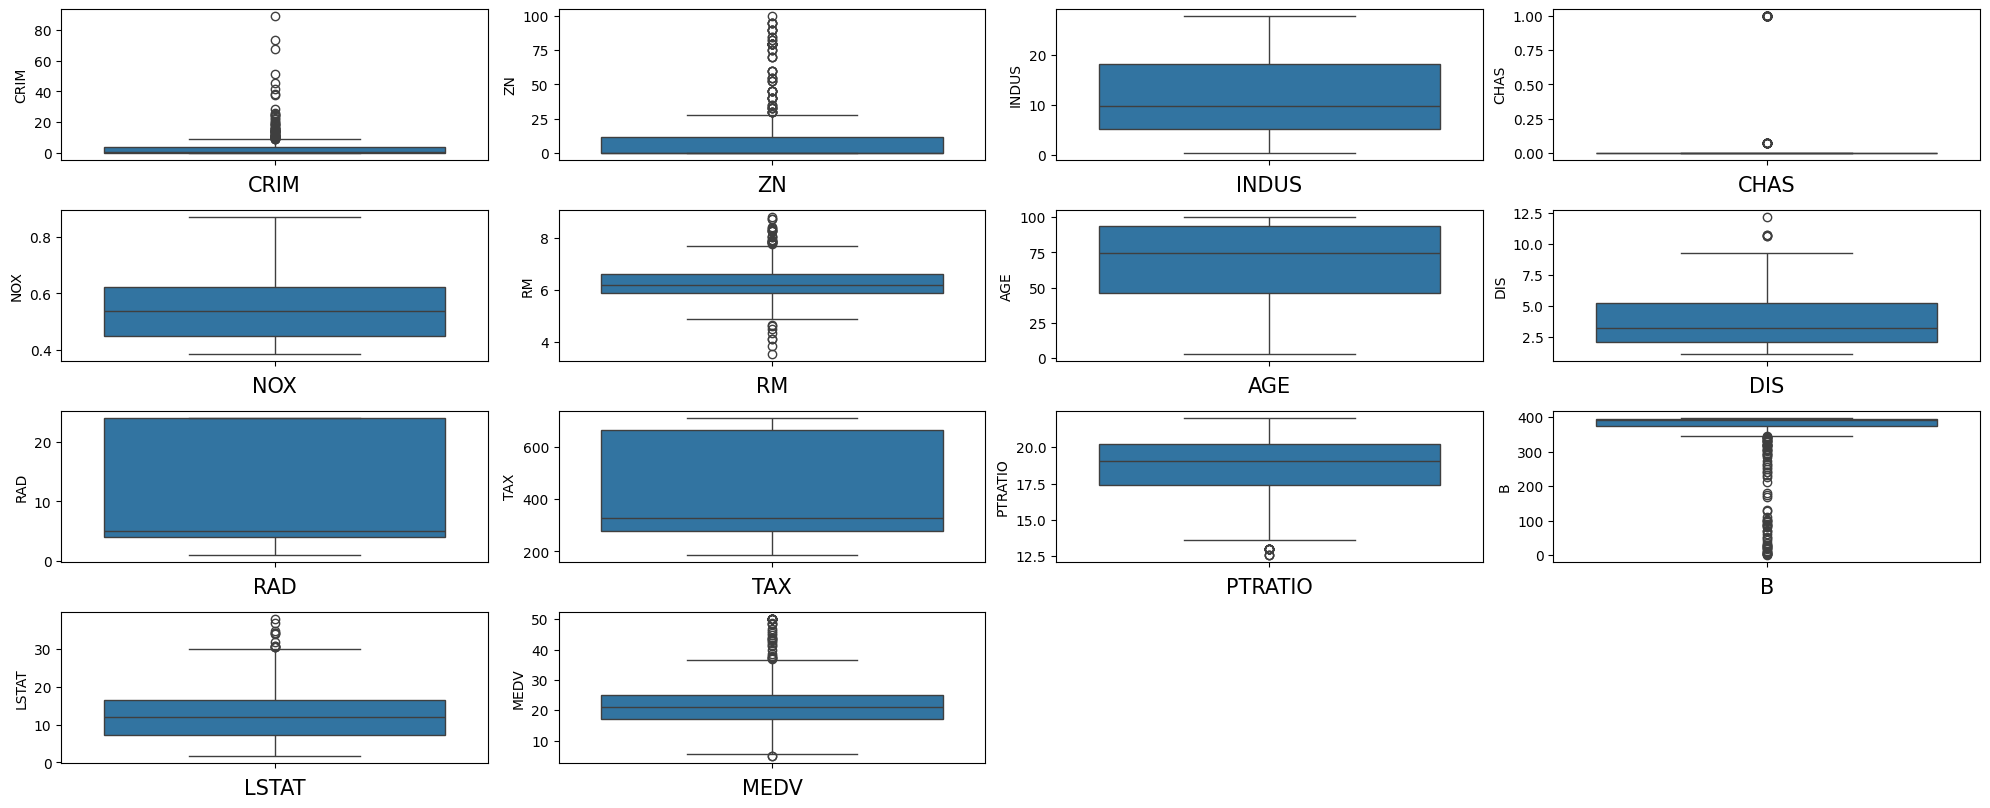

In [33]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_cleaned.columns):
        plt.subplot(20, 4, plotnum)
        sns.boxplot(df_cleaned[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

In [75]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # To get all outliers of data
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    # To get all data without outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) | (df_cleaned[col] <= upper_bound)]

In [35]:
outliers_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
print(outlier_counts)

{'CRIM': 64, 'ZN': 68, 'INDUS': 0, 'CHAS': 54, 'NOX': 0, 'RM': 30, 'AGE': 0, 'DIS': 5, 'RAD': 0, 'TAX': 0, 'PTRATIO': 15, 'B': 77, 'LSTAT': 12, 'MEDV': 40}


In [71]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

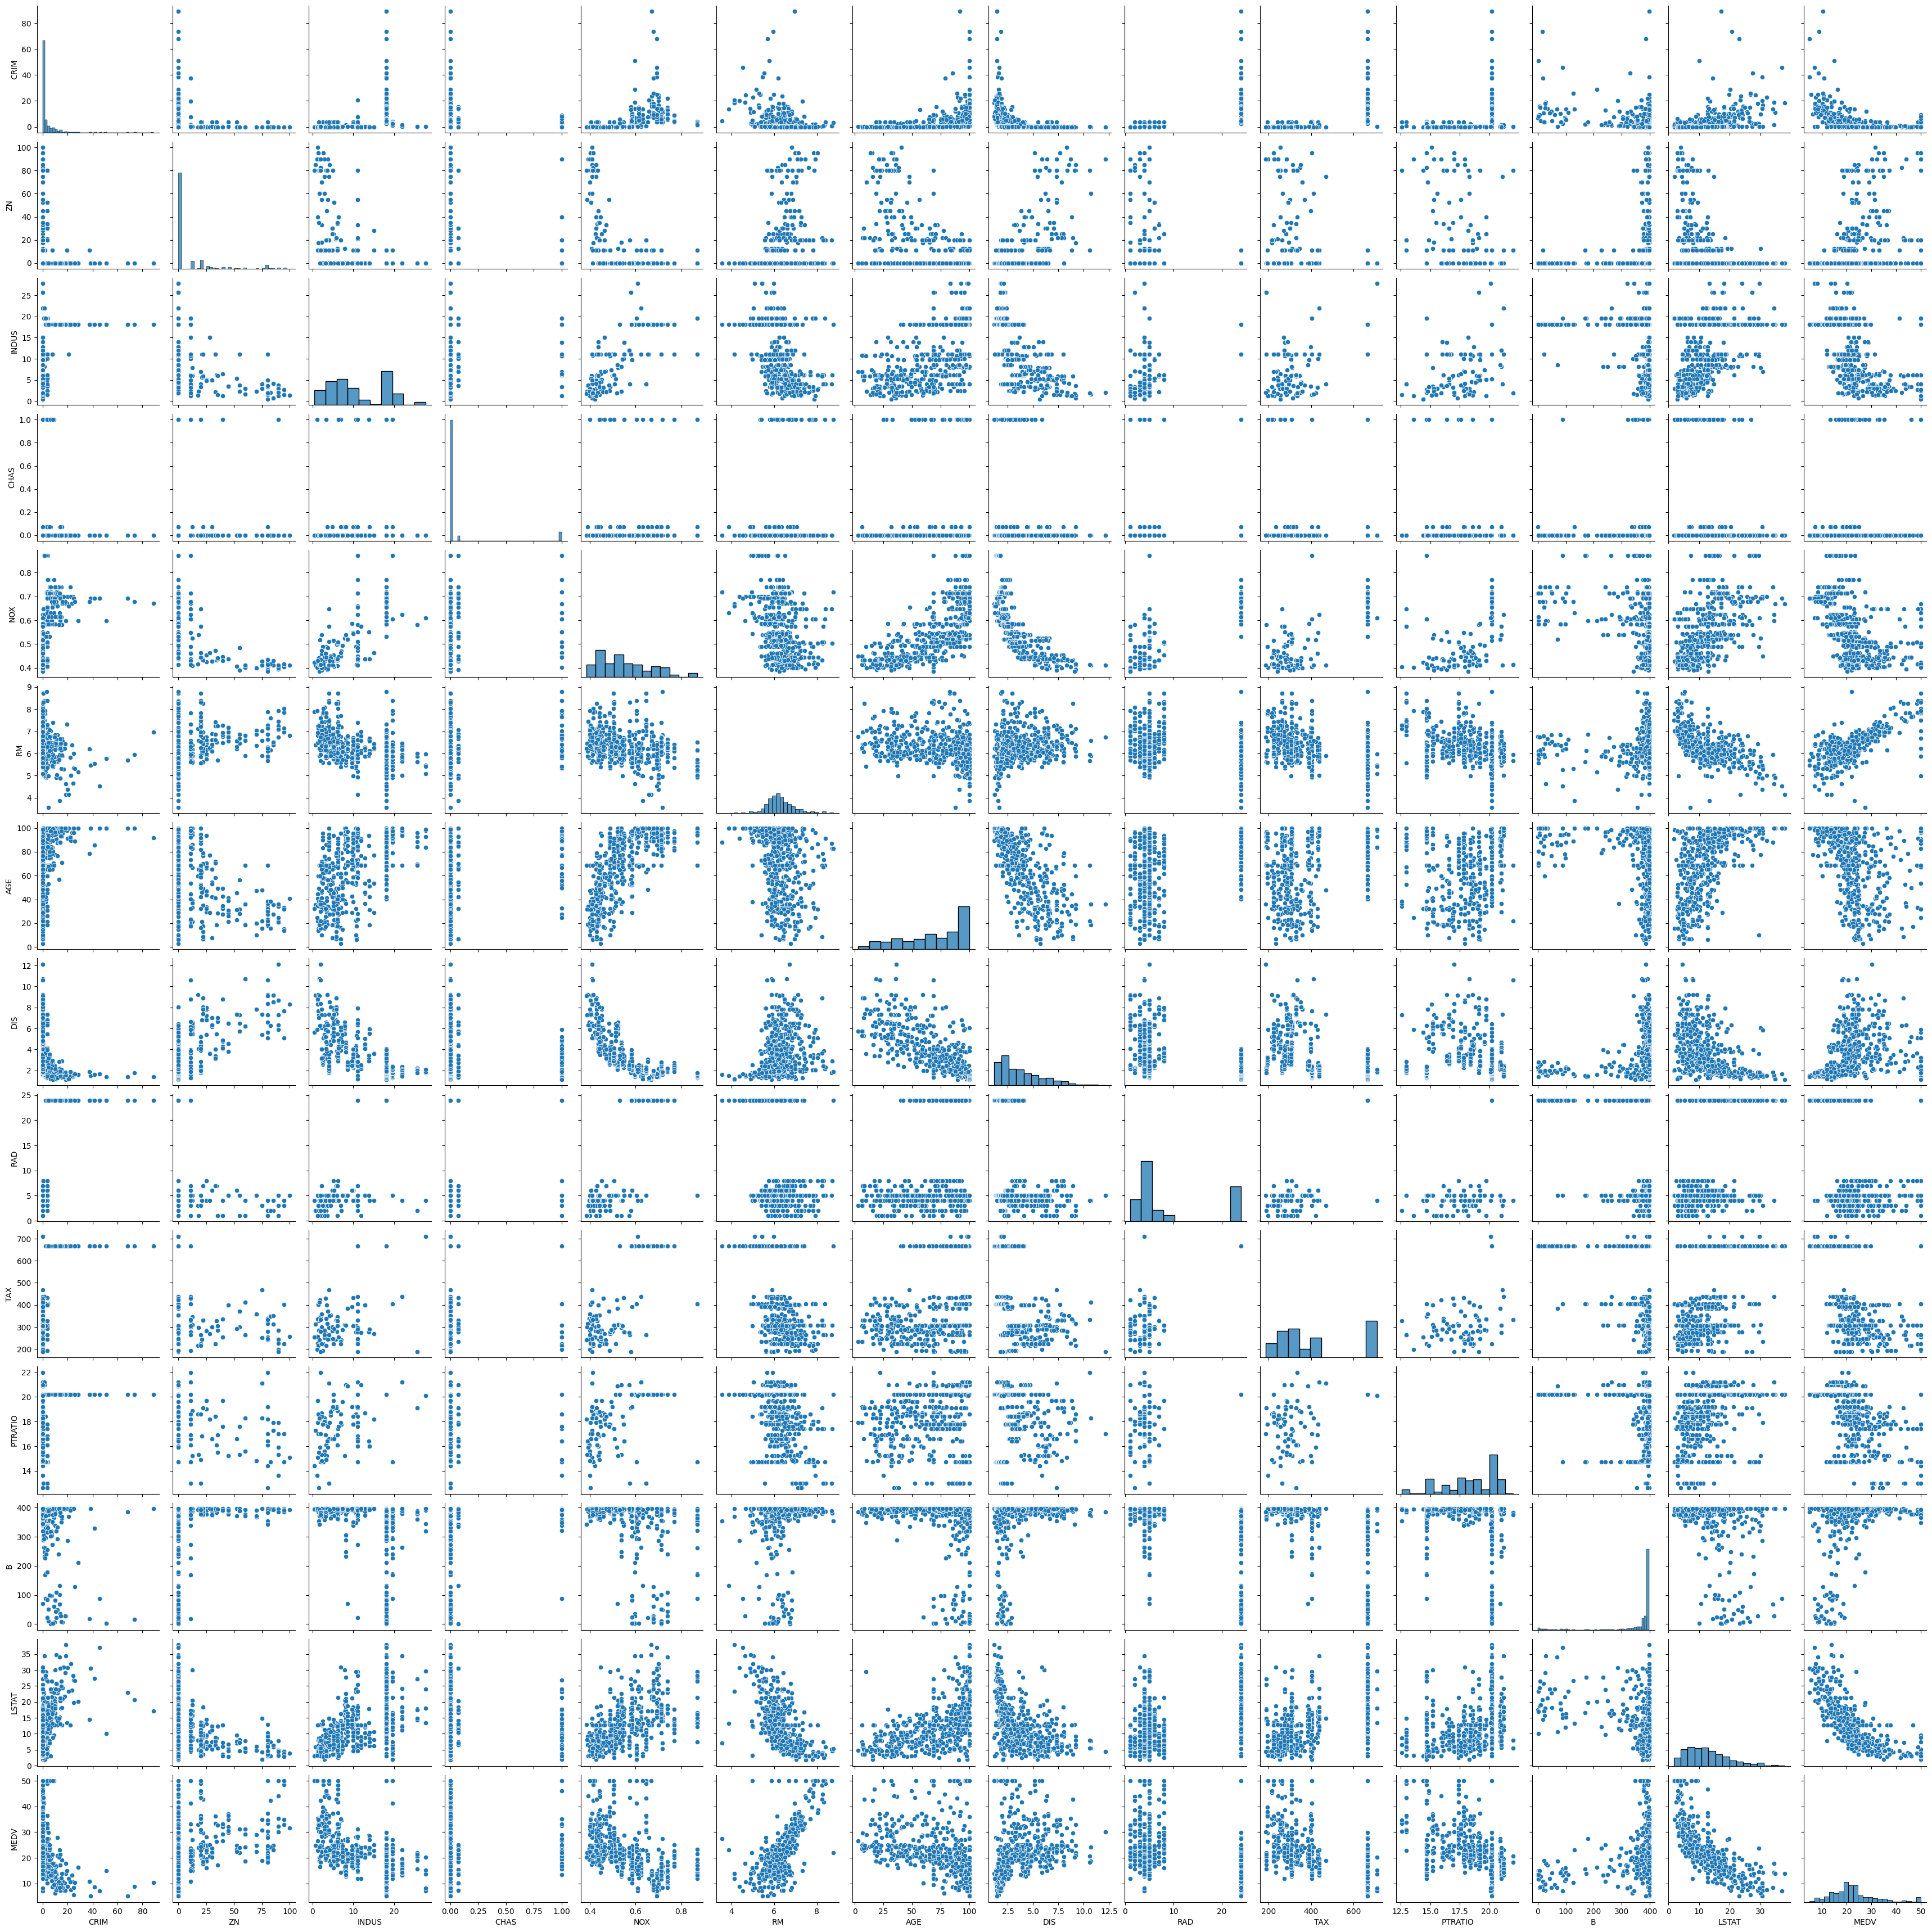

In [44]:
sns.pairplot(df_cleaned)

Using Log Transformation

In [40]:
skewed_feature = ['CRIM', 'ZN', 'DIS', 'RAD', 'LSTAT', 'TAX']
for col in df_cleaned:
    df_cleaned[col] = np.log1p(df_cleaned[col])

Get the correlation between features

<Axes: >

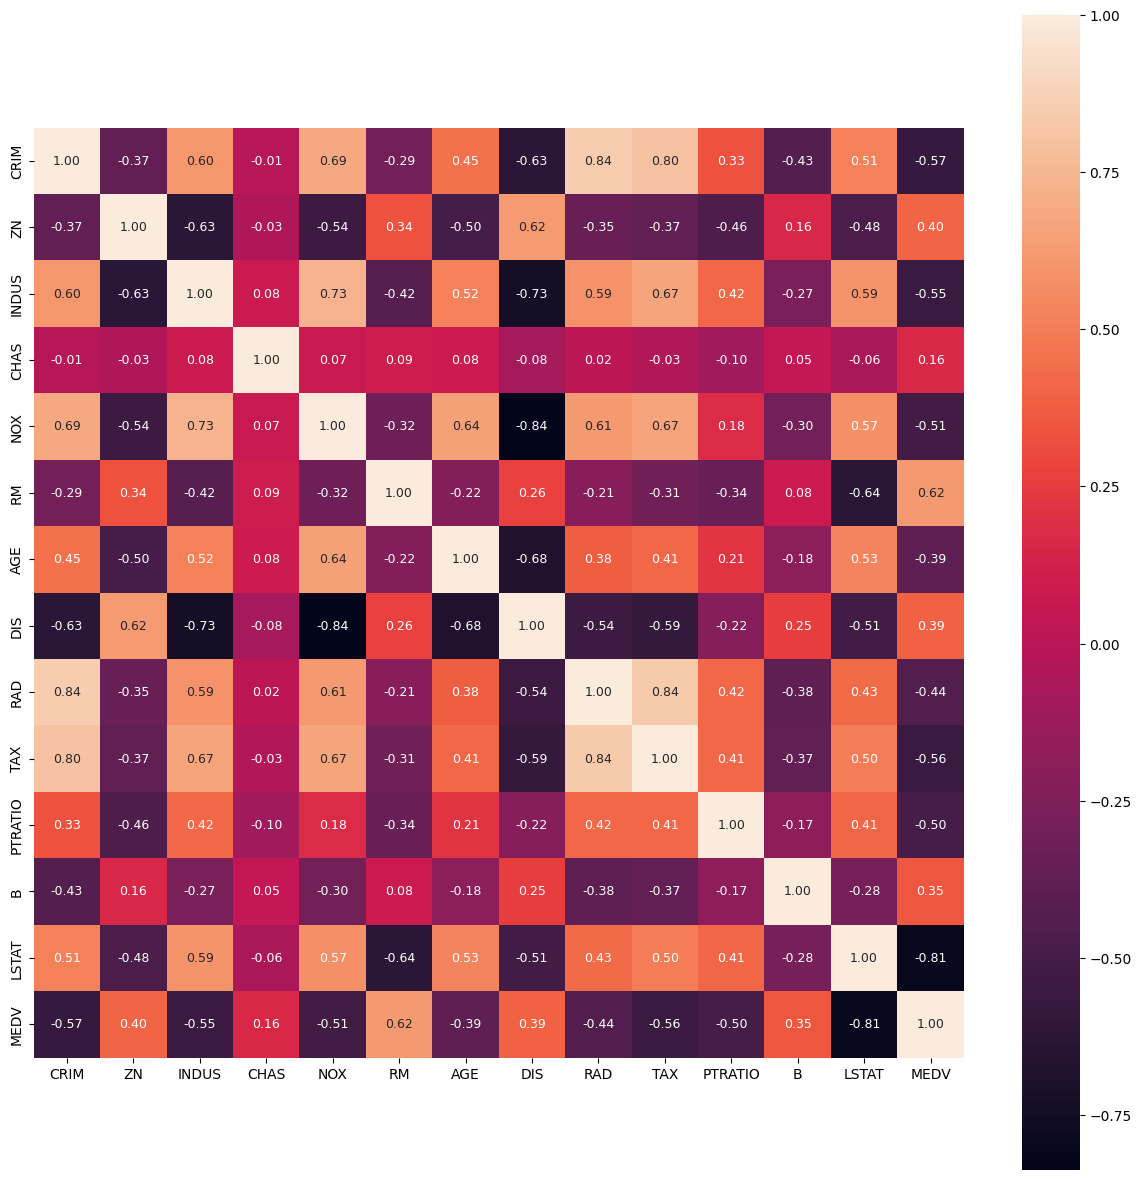

In [41]:
colu = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

corr = df_cleaned[colu].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.2f', cbar=True, square=True, annot=True, annot_kws={'size':9})

Split the data into x, y where y is our target variable (which we want to predict) and x contains all the independent variables (features) used to predict y.

In [42]:
x = df_cleaned.drop(columns=['MEDV'], axis=1)
y = df_cleaned.MEDV

Standardization

In [72]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [44]:
print(f"x shape  :  {x_scaled.shape}")
print(f"y shape  :  {y.shape}")

x shape  :  (506, 13)
y shape  :  (506,)


Split x and y into train and test

In [74]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

Modeling

In [9]:
#Define model, loss, gradient functions

def predict(X, w):
    """ Predict using linear model: X @ w """
    return X.dot(w)

def loss_mse(X, y, w):
    """ Mean Squared Error loss """
    y_pred = predict(X, w)
    return np.mean((y_pred - y) ** 2)

def gradient(X, y, w):
    """ Gradient of MSE w.r.t w """
    N = X.shape[0]
    y_pred = predict(X, w)
    # derivative: (2/N) * X^T (y_pred - y)
    return (2 / N) * (X.T.dot(y_pred - y))

#Gradient descent training
d_plus1 = X_train.shape[1]  # number of parameters (features + bias)
w = np.zeros(d_plus1)  # initialize weights to zero

learning_rate = 0.1
epochs = 5000

for epoch in range(epochs):
    grad = gradient(X_train, y_train, w)
    w = w - learning_rate * grad

    if epoch % 500 == 0:
        train_loss = loss_mse(X_train, y_train, w)
        test_loss = loss_mse(X_test, y_test, w)
        print(f"Epoch {epoch}: train_loss={train_loss:.4f}, test_loss={test_loss:.4f}")

#Final evaluation
final_train_loss = loss_mse(X_train, y_train, w)
final_test_loss = loss_mse(X_test, y_test, w)
print("Final train loss (normalized):", final_train_loss)
print("Final test loss (normalized):", final_test_loss)

#Convert predictions back to original scale
y_test_pred_norm = predict(X_test, w)

#Denormalize predictions and true y
y_test_pred = y_test_pred_norm * y_std + y_mean
y_test_true = y_test * y_std + y_mean

# Compute RMSE in original units
rmse = np.sqrt(np.mean((y_test_pred - y_test_true) ** 2))
print("Test RMSE (original units):", rmse)

#Inspect learned weights (parameters)
print("Learned weights (including intercept):", w)


Epoch 0: train_loss=0.5386, test_loss=0.1733
Epoch 500: train_loss=0.2804, test_loss=0.4002
Epoch 1000: train_loss=0.2804, test_loss=0.4007
Epoch 1500: train_loss=0.2804, test_loss=0.4007
Epoch 2000: train_loss=0.2804, test_loss=0.4007
Epoch 2500: train_loss=0.2804, test_loss=0.4007
Epoch 3000: train_loss=0.2804, test_loss=0.4007
Epoch 3500: train_loss=0.2804, test_loss=0.4007
Epoch 4000: train_loss=0.2804, test_loss=0.4007
Epoch 4500: train_loss=0.2804, test_loss=0.4007
Final train loss (normalized): 0.2803653628849577
Final test loss (normalized): 0.40068446634082183
Test RMSE (original units): 5.815978404977294
Learned weights (including intercept): [ 0.06327121 -0.18758852  0.0963905  -0.01334904  0.06104714 -0.16241757
  0.39021937 -0.03659706 -0.30496835  0.39491113 -0.25485819 -0.18268185
 -0.02622991 -0.3530103 ]


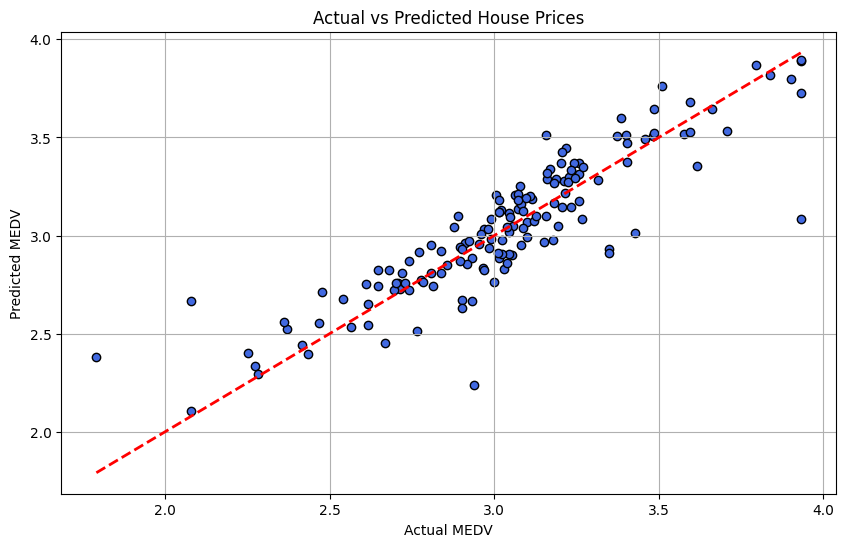

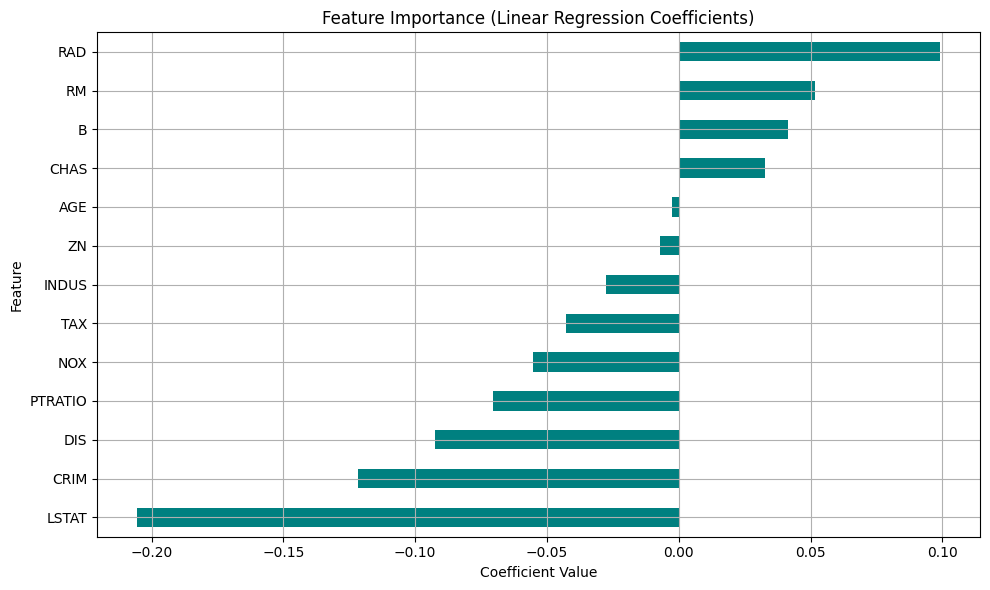

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

#Analyzing the model parameters (the effect of each feature on the MEDV)
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients = coefficients.sort_values()

#Bar plot of the most important effects
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

CHECKING WITH SCI-KIT MODEL

In [92]:
sci_model = LinearRegression()

# Convert to NumPy array
x_train_np = x_train.values
x_test_np = x_test.values

# Fit the model
sci_model.fit(x_train_np, y_train)
sci_pred = sci_model.predict(x_test_np)

# Evaluate
mse_sci = mean_squared_error(y_test, sci_pred)
r2_sci = r2_score(y_test, sci_pred)
mae_sci = mean_absolute_error(y_test, sci_pred)
rmse_sci = np.sqrt(mse_sci)

print("MAE :", mae_sci)
print("MSE :", mse_sci)
print("RMSE :", rmse_sci)
print("R2_score:", r2_sci)

MAE : 0.12127444541728134
MSE : 0.030428369337351227
RMSE : 0.17443729342474684
R2_score: 0.7787419183404726
